# Exgal 2021 Numerical Homework 5: The Color of the Sun



In [1]:
#
# Setup numbers, and a black body.
# 
# RUN THIS CELL FIRST.
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
h =  6.62607e-27        #erg s
c =  2.998e10           #cm/s
kb = 1.38065e-16        #erg/K
sigma_sb = 5.670373e-05 #erg/(K**4*cm**2*s)
Rsun_cm = 6.9550e10     #cm
Lsun = 3.827e+33        #erg/s
AU_in_cm = 1.4960e+13   #cm
pc_in_cm = 3.0857e+18   #cm
Tsun = 5770             #K

def black_body(L,T):
    return 2*h*c**2*(L**-5)/(np.exp(h*c/(L*kb*T) )-1)
        
L_edge = np.linspace(100e-7,10000e-7,1000)
dL = L_edge[1:]-L_edge[:-1]
L = 0.5*(L_edge[1:]+L_edge[:-1])

CW = 0.49292929292929288 #the constant you want.

## Let's compute the color of the sun.

We know that the spectrum of the sun is a black body, plus an atmosphere.  We'll ignore the atmosphere for now, because it works pretty well to ignore it, and it's extremely complicated.  So the sun basically looks like a black body at 5770K.  

The color $$B-V = -2.5 \log_{10} L_B/L_V + C$$ is the log of the ratio of luminosities of an object.  The Blue luminosity, $L_B$ is the amount of luminosity in the $B-$band, and $L_V$ is the luminosity in the $V-$band.  

There are many filters, but the standard B and V filters are treated like gaussians with:
1. B has a center at 445 nm and a width of 94nm
1. V has a center at 551 nm and a width of 88nm

So in this homework, we'll
1. Represent the $B$ and $V$ filters as narrow Gaussians described above
1. Compute $L_B$ and $L_V$ for a black body at 5770K (discussed more below)
1. Compute the color B-V of that black body.
1. Compare to the sun.

# A note on Filters

Getting a spectrum is very complicated. A filter and color is easy, and gets us most of the physics that we want.  
If my whole spectrum is $S(\lambda)$, (today a black body, but in principle super complicated) then the total Luminosity is $\int S(\lambda) d\lambda$.
I can take just part of that, with a filter $Q$ (either $B$ or $V$), $T_Q(\lambda)$
$$
L_Q = \int S(\lambda) T_Q(\lambda) d\lambda
$$

If my filter is a delta function, then I get the value at just one frequency: $T_{\lambda^\prime}(\lambda)= \delta(\lambda - \lambda^\prime)$, you pick out just the flux at $\lambda^\prime$:

$$
\int S(\lambda) \delta( \lambda - \lambda^\prime)d\lambda = S(\lambda^\prime)
$$

That's what I really want, but I can't make a delta-function filter very easily (Also, I would get no photons if it were a true delta function).  But I can make a pretty narrow gaussian:
$$
G_{\lambda^\prime,\sigma}(\lambda) = A e^{-(\lambda-\lambda^\prime)^2/2 \sigma}
$$
which is a bell-shaped curve centered at $\lambda^\prime$ and with a width $2\sigma$.

That constant, $A$, is to make sure that $\int G(\lambda) d\lambda = 1$. That way, when we multiply it by our source and integrate, we don't add any extra signal.  While there is an analytic expression for A for a gaussian, that needs $dx\rightarrow 0$.  In code, we have finite $dx$, so we'll get $A$ by just dividing by `sum(G*dL)`.  

Filters are often described by their central wavelength, $\lambda_0$, and the Full Width at Half Max (FWHM).  That's related to the variance of the gaussian, $\sigma$, as $FWHM = \sigma \times 2\sqrt{2 \ln 2}$. We'll only deal with FWHM, so you can forget this paragraph.

The next cell defines a normalized gaussian and then plots an example:

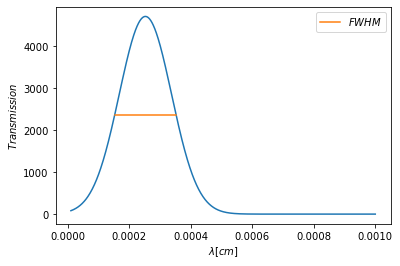

In [22]:
def gaussian(center,fwhm):
    #This uses L and dL defined above.
    width = fwhm/(2*np.sqrt(2*np.log(2)))
    g1 = np.exp(-(L-center)**2/(2*width**2))
    norm = (dL*g1).sum()
    output=g1/norm
    return output


Lcenter=L.mean()/2
fwhm = 2000e-7

Tfilter = gaussian(Lcenter, fwhm=fwhm)

plt.plot(L, Tfilter)

HalfMax = Tfilter.max()*0.5

plt.plot([Lcenter-0.5*fwhm, Lcenter+0.5*fwhm], [HalfMax,HalfMax], label=r'$FWHM$')
plt.xlabel(r'$\lambda [cm]$')
plt.ylabel(r'$Transmission$')
plt.legend(loc=0)

Let's plot the black body and two filters together.  Note the black body gets the left axis, and the filters get the right.

Text(0, 0.5, 'Filters')

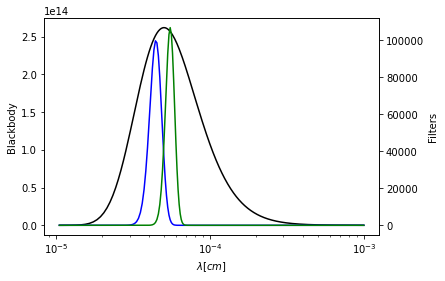

In [34]:
S = black_body(L,Tsun)

Lambda_b=445e-7
fwhm_b=94e-7
Lambda_v=551e-7
fwhm_v=88e-7
T_B = gaussian(Lambda_b,fwhm_b)
L_B = (T_B*S*dL).sum()
#plt.scatter(Lambda_b,L_B,c='b')
T_V = gaussian(Lambda_v,fwhm_v)
L_V = (T_V*S*dL).sum()
#plt.scatter(Lambda_v,L_V,c='g')
fig,ax=plt.subplots(1,1)
ax2=ax.twinx()
ax.set_xscale('log')
ax2.set_xscale('log')
ax.plot(L,S,c='k')
ax2.plot(L,T_B,c='b')
ax2.plot(L,T_V,c='g')
ax.set_xlabel(r'$\lambda[cm]$')
ax.set_ylabel('Blackbody')
ax2.set_ylabel('Filters')

The B-band luminosity is just the portion of total luminosity in the B-band.  That is, the part of the black curve that's under the blue one:
$$L_B = \int T_B(\lambda) S(\lambda) d\lambda$$

or numerically,

```

T_B = gaussian(center,width)
S = black_body(L,Tsun)
LB = (T_B*S*dlambda).sum()

```


## Color

Color is defined as the differences in magnitudes, or the log of the ratio of fluxes:
$$
B-V = -2.5 \log L_B/L_V + CW
$$
where the constant $CW$ is a combination of the fiducial $B$ and $V$ fluxes for an A star, and can be found in the first cell. 


### Problem 1

_5 pts_

Using the `black_body` function from the first cell, plot the black body for the sun.  Label your axes.

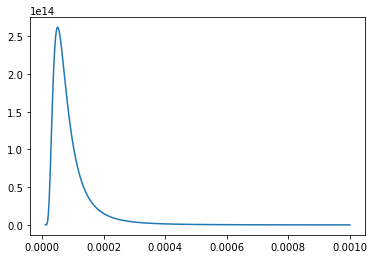

In [5]:
# work here
B = black_body(L,Tsun)
plt.plot(L,B)

### Problem 2

_5 pts_

Let's compute $L_B$ and $L_V$, and plot them on the black body.

1. Make an array for the spectrum using the black body function
1. Make an array for the B filter, `T_B` using the gaussian and parameters in the first cell.
1. Make an array for the V filter, `T_V` in the same way.
1. Compute $L_B$ and $L_V$
1. Plot the blackbody. Use `plt.xscale('log')` to get log x-axis. 
1. Use `plt.scatter` to plot $L_B$ and $L_V$ on the spectrum.


In [2]:
#work here

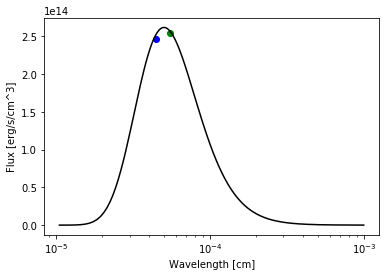

In [4]:
#Your solution should look like this

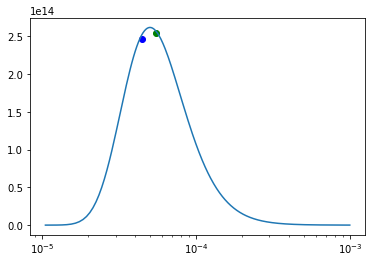

In [17]:
S = black_body(L,Tsun)
plt.plot(L,S)
plt.xscale('log')
Lambda_b=445e-7
fwhm_b=94e-7
Lambda_v=551e-7
fwhm_v=88e-7
T_B = gaussian(Lambda_b,fwhm_b)
L_B = (T_B*S*dL).sum()
plt.scatter(Lambda_b,L_B,c='b')
T_V = gaussian(Lambda_v,fwhm_v)
L_V = (T_V*S*dL).sum()
plt.scatter(Lambda_v,L_V,c='g')

### Problem 3

Compute the B-V color of the sun.  How close do you get to the observed value of 0.63?

In [21]:
BmV=-2.5*np.log10(L_B/L_V)+CW
print(BmV)

0.526556059137899


### Problem 4

_2 pts_

How long did this take you?